# Exploratory  Data Analysis : 2019

# Introduction
In this notebook we are going to check if amount of loan approved has anything to do with the race of the person. To achive this we are going to check the correlation of the columns with race of borrower and try find any patterns that relate to race. 

## Import relevant Packages

In [92]:
#Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importing the data from Data from DW step

In [93]:
#Read Data
df_2019=pd.read_csv('Data/2019_dw_data.csv')

In [94]:
#Exploring the data
df_2019.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Year,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407198,2407199,2407200,2407201,2407202
Bank,Boston,Boston,Boston,Boston,Boston
FIPSStateNumericCode,50,50,50,50,23
FIPSCountyCode,7,7,15,17,31
CoreBasedStatisticalAreaCode,15540,15540,99999,30100,38860
CensusTractIdentifier,34,29,9532,9594,254
CensusTractMinorityRatioPercent,4.577,3.421,6.152,3.935,6.031
CensusTractMedFamIncomeAmount,132474,100795,49625,62643,87679


In [95]:
#Drop Unnamed:0 column
df_2019=df_2019.iloc[:,1:]

In [96]:
#Check the shape of the DataFrame
df_2019.shape

(89767, 54)

In [97]:
#Check tha data again
df_2019.head().transpose()

,0,1,2,3,4
Year,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407198,2407199,2407200,2407201,2407202
Bank,Boston,Boston,Boston,Boston,Boston
FIPSStateNumericCode,50,50,50,50,23
FIPSCountyCode,7,7,15,17,31
CoreBasedStatisticalAreaCode,15540,15540,99999,30100,38860
CensusTractIdentifier,34,29,9532,9594,254
CensusTractMinorityRatioPercent,4.577,3.421,6.152,3.935,6.031
CensusTractMedFamIncomeAmount,132474,100795,49625,62643,87679
LocalAreaMedianIncomeAmount,84290,84290,67566,67105,76445


## Check Borrower Count
- Check the number of borrowers to see how many borrowers are assigned to each loan. 

In [98]:
#Check the Borrower Counts using value counts.
df_2019['BorrowerCount'].value_counts()

2    51372
1    37910
3      401
4       83
5        1
Name: BorrowerCount, dtype: int64

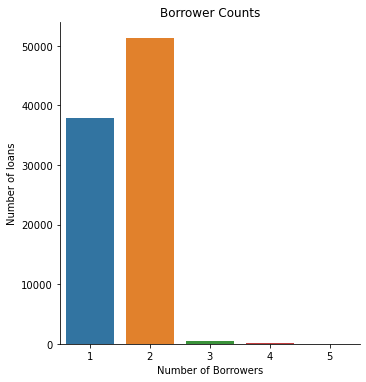

In [99]:
#Plot Borrower count
sns.catplot(x="BorrowerCount", kind="count", data=df_2019)
plt.xlabel('Number of Borrowers')
plt.ylabel('Number of loans')
plt.title("Borrower Counts")
plt.show()

Hence most of the loans have one and two borrowers. Therefore we will focus on the race of borrower1 and borrower2 only since most probably race of only first 2 borrower will contribute to the biases if there is any.

## Check race count of Borrower 1 and Borrower 2:  Borrower1Race1Type ,Borrower2Race1Type
We will check the frequency of the races of these two borrowers.

In [100]:
#Check the Borrower Counts using value counts. 
#Numeric code indicating the race of the Borrower. 1=American Indian or Alaska Native, 2=Asian, 
#3=Black or African American, 4=Native Hawaiian or other Pacific Islander, 
#5=White, 6=Information not provided by Borrower, 
#7=Not Applicable (First or primary borrower is an institution, corporation or partnership)
df_2019['Borrower1Race1Type'].value_counts()

5    76982
6     7352
2     3128
3     1677
1      516
4      112
Name: Borrower1Race1Type, dtype: int64

In [101]:
#Repplace values with names
df_2019=df_2019.replace({'Borrower1Race1Type': {1:'American Indian', 2:'Asian', 3:'Black', 4:'Native Hawaiian', 5:'White', 6:'No Information', 7:'Not Applicable'}})

In [102]:
df_2019['Borrower1Race1Type'].head()

0    White
1    White
2    White
3    White
4    White
Name: Borrower1Race1Type, dtype: object

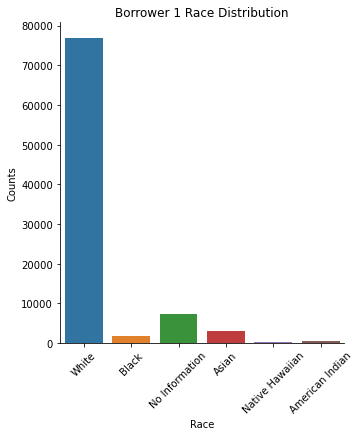

In [103]:
#Check Visually
#df_2019['Borrower1Race1Type'].hist()
sns.catplot(x="Borrower1Race1Type", kind="count", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.title("Borrower 1 Race Distribution")
plt.show()

Hence most of the borrower1 are of white race and arond 7000 borrowers did not provide any information.

In [104]:
#Borrower 2
#Numeric code indicating the race of the Co-Borrower. 1=American Indian or Alaska Native, 2=Asian, 
#3=Black or African American, 4=Native Hawaiian or other Pacific Islander, 5=White, 
#6=Information not provided by borrower, 
#7=Not Applicable (First or primary borrower is an institution, corporation or partnership), 8=No Co-Borrower
df_2019['Borrower2Race1Type'].value_counts()

5    44821
8    37965
6     4502
2     1577
3      638
1      199
4       64
7        1
Name: Borrower2Race1Type, dtype: int64

In [105]:
#Replace code with names 
#Repplace values with names
df_2019=df_2019.replace({'Borrower2Race1Type': {1:'American Indian', 2:'Asian', 3:'Black', 4:'Native Hawaiian', 5:'White', 6:'No Information', 7:'Not Applicable',8:'No Co-Borrower'}})

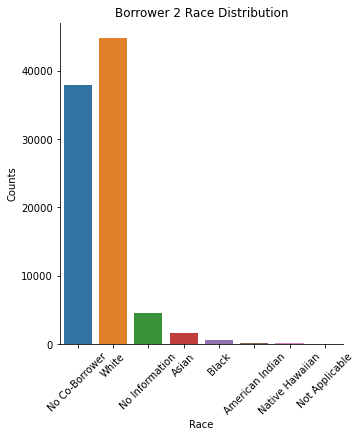

In [106]:
#Check Visually
#df_2019['Borrower2Race1Type'].hist()
sns.catplot(x="Borrower2Race1Type", kind="count", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.title("Borrower 2 Race Distribution")
plt.show()

Hence most of the borrower2 are of white race and around 38000 loans don't have co-borrower.

## Check Banks according to there race distribuation.

In [107]:
#Bank Frequency
df_2019['Bank'].value_counts()

Chicago          22462
Topeka           16093
Des Moines       14468
Cincinnati       11250
Dallas            8069
Indianapolis      5677
Pittsburgh        4458
Boston            2824
San Francisco     2487
New York          1979
Name: Bank, dtype: int64

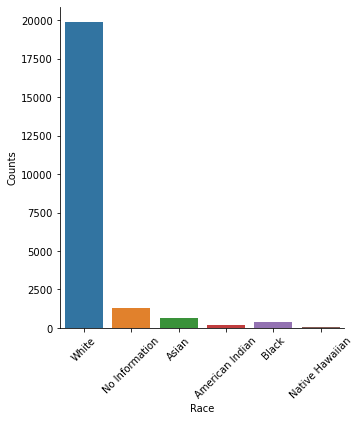

In [108]:
#Chicago
sns.catplot(x="Borrower1Race1Type", kind="count", data=df_2019[df_2019['Bank']=='Chicago'])
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

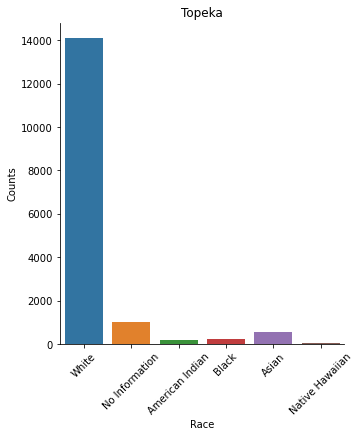

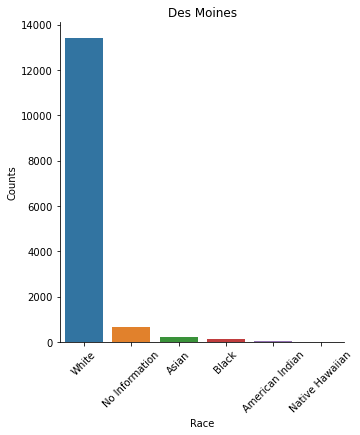

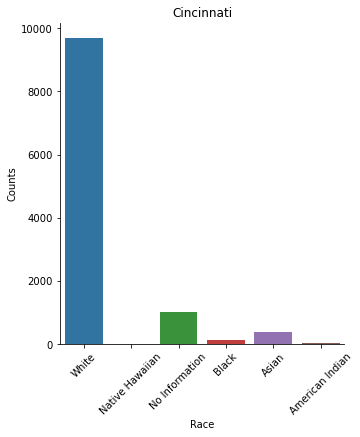

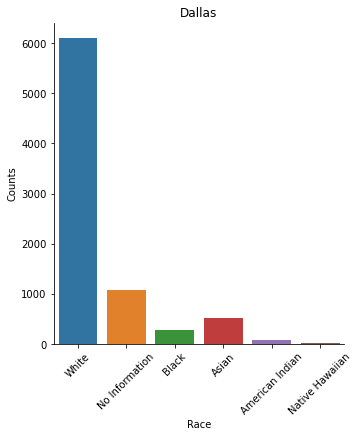

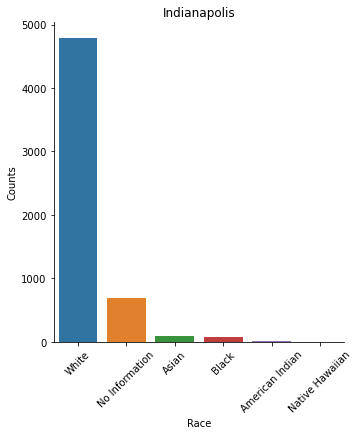

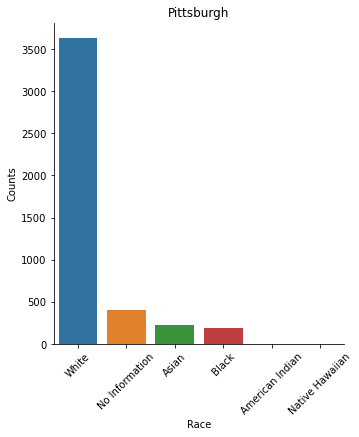

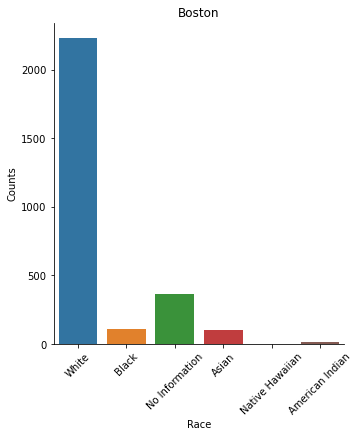

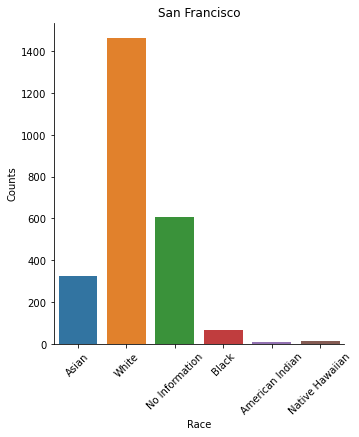

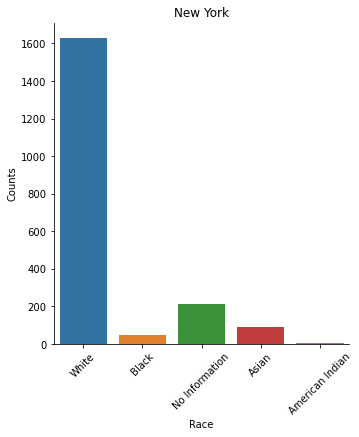

In [109]:
#View distribuation of races in the remaing cities.
for bank in ['Topeka','Des Moines','Cincinnati','Dallas','Indianapolis','Pittsburgh','Boston','San Francisco','New York']:
    #df_2019[df_2019['Bank']==bank]['Borrower1Race1Type'].hist()
    sns.catplot(x="Borrower1Race1Type", kind="count", data=df_2019[df_2019['Bank']==bank])
    plt.xlabel('Race')
    plt.ylabel('Counts')
    plt.xticks(rotation = 45)
    plt.title(bank)
    plt.show()

Hence all the cities have majority of white borrowers to whom loan was approved.Lets check the distribuation of co-borrowers. 

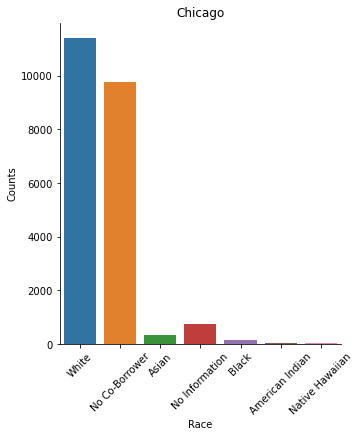

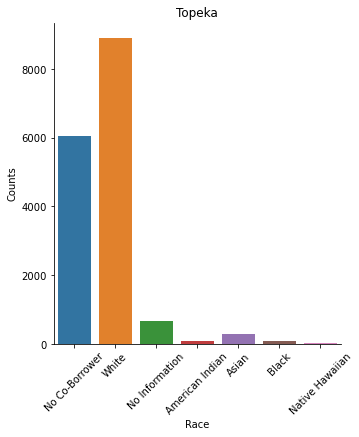

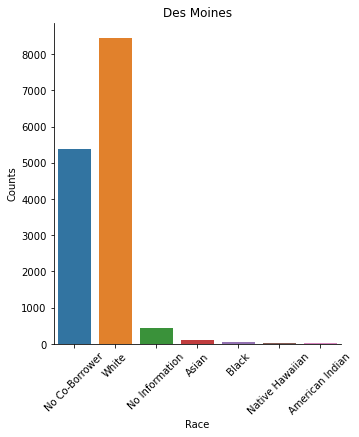

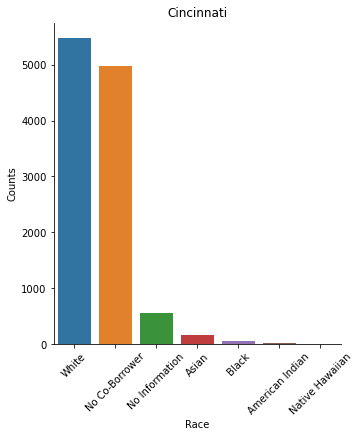

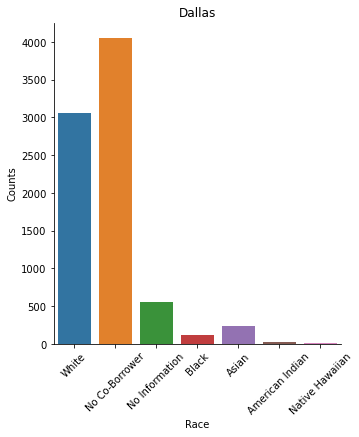

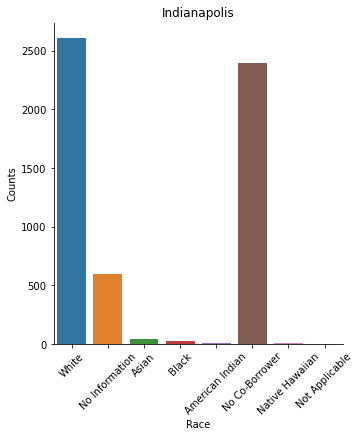

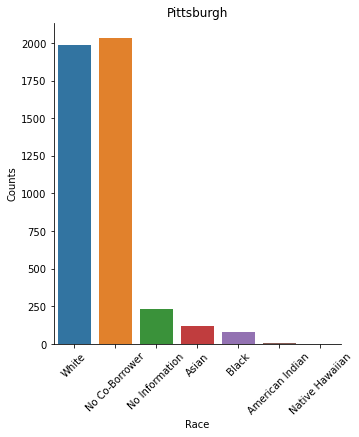

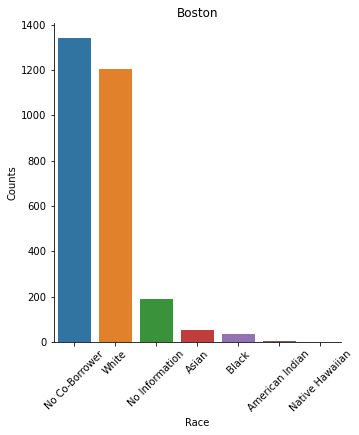

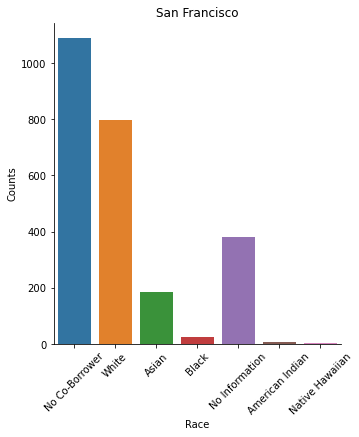

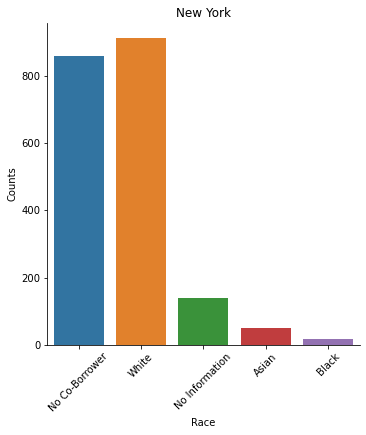

In [110]:
#View distribuation of races for co-borrowers.
for bank in ['Chicago','Topeka','Des Moines','Cincinnati','Dallas','Indianapolis','Pittsburgh','Boston','San Francisco','New York']:
    #df_2019[df_2019['Bank']==bank]['Borrower2Race1Type'].hist()
    sns.catplot(x="Borrower2Race1Type", kind="count", data=df_2019[df_2019['Bank']==bank])
    plt.xlabel('Race')
    plt.ylabel('Counts')
    plt.xticks(rotation = 45)
    plt.title(bank)
    plt.show()

We see similar pattern in the distribuation of co-borrowers. Majority of co-borrowers are white in all the above cities.

## Lets check local area median income and total monthly income to see if income used to underwrite the loan for various races matches(approx near) local median income
We are going to check if income used to underwrite loan is approximatly same for all the races in the given Cencus area.

Let check the distribuation of total monthly income with the race.

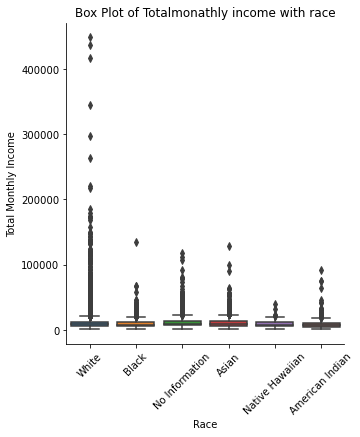

In [121]:
#Boxplot of the total monthly incoem used to underwrite the loan.
sns.catplot(x="Borrower1Race1Type", y="TotalMonthlyIncomeAmount", kind="box", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Total Monthly Income')
plt.xticks(rotation = 45)
plt.title("Box Plot of Totalmonathly income with race")
plt.show()

Hence we see that eventhough mean of all the race groups are around same,white race is having large number of high incomes with few even crossing 300000 mark.

## Let check the distribuation of Total Monthly income and families with income above 100000

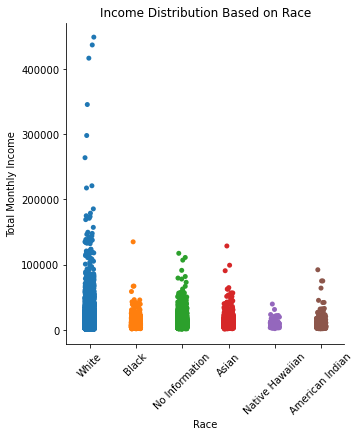

In [127]:
#Check the distribuation of Total MonthlyIncome
sns.catplot(x="Borrower1Race1Type", y="TotalMonthlyIncomeAmount", data=df_2019)
plt.xlabel('Race')
plt.ylabel('Total Monthly Income')
plt.xticks(rotation = 45)
plt.title("Income Distribution Based on Race")
plt.show()

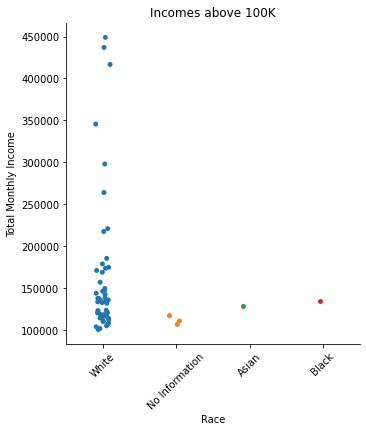

In [126]:
#Check the distribuation of incomes above 100K
sns.catplot(x="Borrower1Race1Type", y="TotalMonthlyIncomeAmount", data=df_2019[df_2019['TotalMonthlyIncomeAmount']>100000])
plt.xlabel('Race')
plt.ylabel('Total Monthly Income')
plt.xticks(rotation = 45)
plt.title("Incomes above 100K")
plt.show()

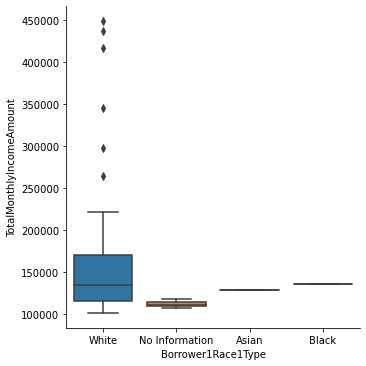

In [128]:
#Boxplot of the incomes above 100K based on race. 
sns.catplot(x="Borrower1Race1Type", y="TotalMonthlyIncomeAmount", kind="box", data=df_2019[df_2019['TotalMonthlyIncomeAmount']>100000])
plt.show()

Hence we see that more number of white people are having high number of monthly income campared to other races.

Now lets check scatter plot of the local area median family income and see how is this diferent from monthly income distribuation.

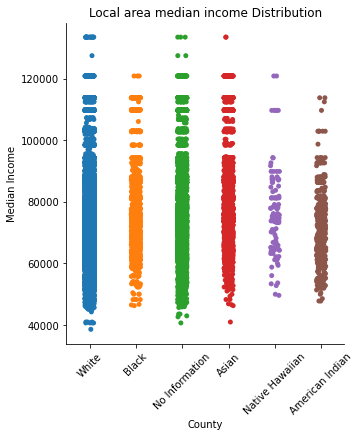

In [143]:
#Scatter plot of the local area median income. 
sns.catplot(x="Borrower1Race1Type", y="LocalAreaMedianIncomeAmount", data=df_2019)
plt.xlabel('County')
plt.ylabel('Median Income')
plt.xticks(rotation = 45)
plt.title("Local area median income Distribution")
plt.show()

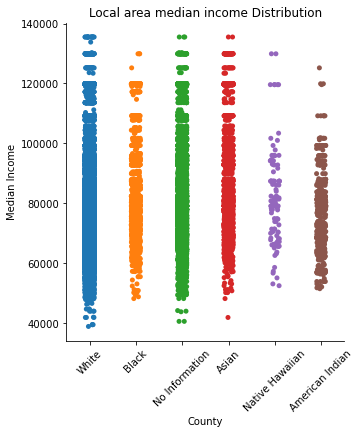

In [166]:
#Scatter plot of the local area median income. 
sns.catplot(x="Borrower1Race1Type", y="HUDMedianIncomeAmount", data=df_2019)
plt.xlabel('County')
plt.ylabel('Median Income')
plt.xticks(rotation = 45)
plt.title("Local area median income Distribution")
plt.show()

### We see from the above scatter plot we see that local area median income for all the races are almost same. Hence we can conclude that there is portion of white population which earns more income compared to other races. 

# Lets move to the LTV Ratio Percent(The loan-to-value ratio of the mortgage at time of origination.) to check if there is any disparity in the ration base on the races. 

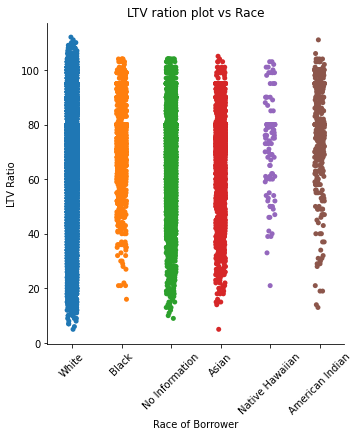

In [135]:
#Check the LTV ratio distribution based on race. 
sns.catplot(x="Borrower1Race1Type", y="LTVRatioPercent", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('LTV Ratio')
plt.xticks(rotation = 45)
plt.title("LTV ration plot vs Race")
plt.show()

Hence almost all the race have similar range of LTV ratio with black genrally having good LTV ration compared to other races which shows almost black loans have good loan amount on their mortages. Whites have wide range of LTV ratio values indicating somes of the whites got low loan amount compare to its mortages.

# Lets check if the interest rate have any relationship with race. 

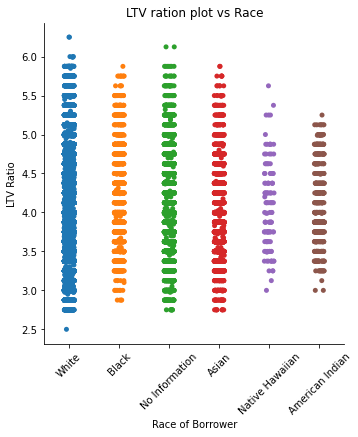

In [144]:
#Check the LTV ratio distribution based on race. 
sns.catplot(x="Borrower1Race1Type", y="NoteRatePercent", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('Intrest rate of the mortages')
plt.xticks(rotation = 45)
plt.title("Interest rate vs race")
plt.show()

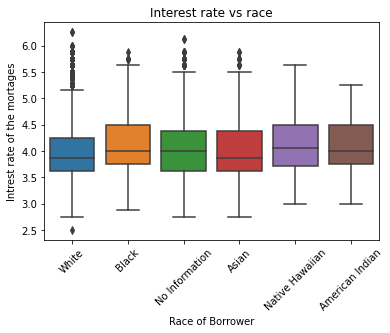

In [145]:
#Check boxlot of the LTV ratio distribution based on race. 
sns.boxplot(x="Borrower1Race1Type", y="NoteRatePercent", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('Intrest rate of the mortages')
plt.xticks(rotation = 45)
plt.title("Interest rate vs race")
plt.show()

From the above plot we see that interest rate have similar distribution among all races.

# Lets check the distribuation of approved Note Amount(Mortgage balance at origination) compared to race

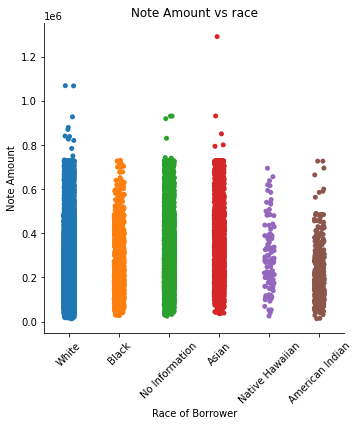

In [149]:
#Check the NoteAmount distribution based on race.
sns.catplot(x="Borrower1Race1Type", y="NoteAmount", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('Note Amount')
plt.xticks(rotation = 45)
plt.title("Note Amount vs race")
plt.show()

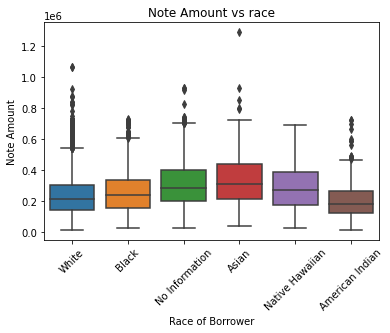

In [150]:
#Check the NoteAmount distribution based on race.
sns.boxplot(x="Borrower1Race1Type", y="NoteAmount", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('Note Amount')
plt.xticks(rotation = 45)
plt.title("Note Amount vs race")
plt.show()

Hence there is no specific pattern is observed in Note Amount compared to race.

# Let's check HousingExpenseRatioPercent and TotalDebtExpenseRatioPercent has anything to do with the race
HousingExpenseRatioPercent: Ratio of mortgage principal and interest and housing expenses to total borrower income.
TotalDebtExpenseRatioPercent: Ratio of all debt payments to total borrower income.

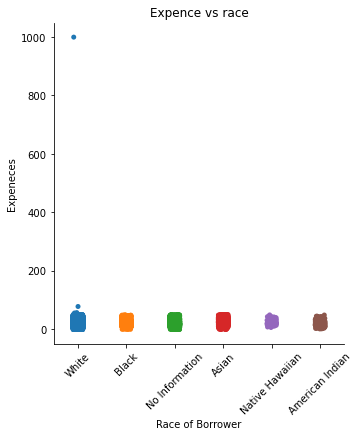

In [151]:
#Check the Expences distribution based on race.
sns.catplot(x="Borrower1Race1Type", y="HousingExpenseRatioPercent", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('Expeneces')
plt.xticks(rotation = 45)
plt.title("Expence vs race")
plt.show()

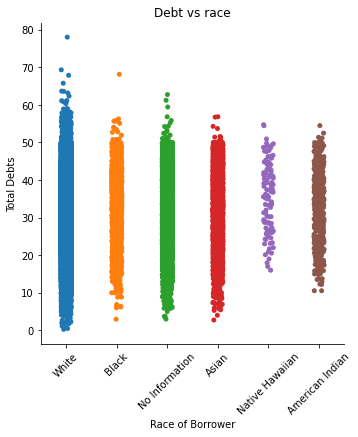

In [153]:
#Check the Total Debts distribution based on race.
sns.catplot(x="Borrower1Race1Type", y="TotalDebtExpenseRatioPercent", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('Total Debts')
plt.xticks(rotation = 45)
plt.title("Debt vs race")
plt.show()

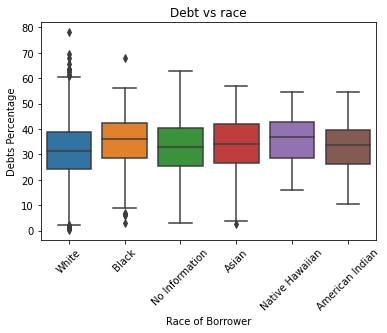

In [165]:
#Check the Total Debts distribution based on race.
sns.boxplot(x="Borrower1Race1Type", y="TotalDebtExpenseRatioPercent", data=df_2019)
plt.xlabel('Race of Borrower')
plt.ylabel('Debts Percentage')
plt.xticks(rotation = 45)
plt.title("Debt vs race")
plt.show()

Hence ther is no specific pattern in HousingExpenseRatioPercent and TotalDebtExpenseRatioPercent which suggest any racial disparity based on race. 

# Let's check credit score of borrower 1 and 2 and see if this has anything have to do with race of borrower. 

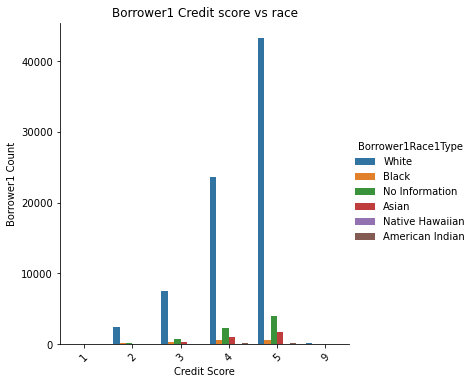

In [163]:
#Check the Total Debts distribution based on race.
sns.catplot(x="Borrower1CreditScoreValue",hue="Borrower1Race1Type", kind="count", data=df_2019)
plt.xlabel('Credit Score')
plt.ylabel('Borrower1 Count')
plt.xticks(rotation = 45)
plt.title("Borrower1 Credit score vs race")
plt.show()

Hence people of white race have high number of peoples with good credit scores(i.e 4,5). 

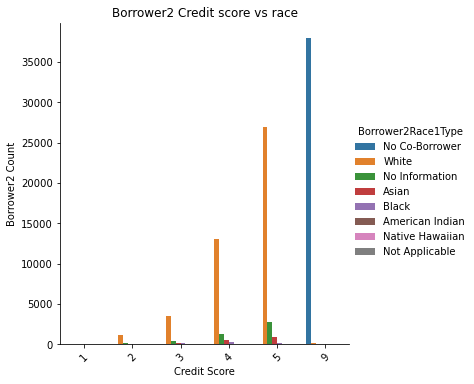

In [164]:
#Check the Total Debts distribution based on race.
sns.catplot(x="Borrower2CreditScoreValue",hue="Borrower2Race1Type", kind="count", data=df_2019)
plt.xlabel('Credit Score')
plt.ylabel('Borrower2 Count')
plt.xticks(rotation = 45)
plt.title("Borrower2 Credit score vs race")
plt.show()

For Co-borrower we see similar pattern, people of white race have high number of people with good credit score. 